# Arboles de decisión

## 1. Importar librerías

In [25]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

from sklearn.datasets import load_iris

## 2. Cargar datasets

In [ ]:
db_iris = load_iris()

## 3. Conocer los datos del dataset

In [ ]:
print(db_iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
db_iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 4. Convertir datasets en un dataframe

In [ ]:
df_iris = pd.DataFrame(db_iris.data, columns=db_iris.feature_names)
df_iris['target'] = db_iris.target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 5. Dividir los datos de entrenamiento

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_iris[db_iris.feature_names], df_iris['target'], random_state=4)

## 6. Instanciar el árbol de clasificación

In [ ]:
class_tree = DecisionTreeClassifier(max_depth=3, random_state=4)

## 7. Entrenando modelo de árbol de decisión

In [ ]:
class_tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4, splitter='best')

## 8. Calcular precisión del algoritmo

In [ ]:
precision = class_tree.score(x_test, y_test)
print(precision)

0.9736842105263158


## 9. Exportar el árbol de decisión

In [ ]:
class_names_list=list(['setosa','versicolor','virginica'])
dot_data = export_graphviz(class_tree,feature_names=db_iris.feature_names, class_names=class_names_list)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree_iris.png')

True

## 10. Características relevantes del modelo

In [ ]:
relevant_data = pd.DataFrame({'feature':x_train.columns,'relevant_data':np.round(class_tree.feature_importances_,3)})
relevant_data = relevant_data.sort_values('relevant_data',ascending=False)
relevant_data.head()

,feature,relevant_data
2,petal length (cm),0.558
3,petal width (cm),0.442
0,sepal length (cm),0.000
1,sepal width (cm),0.000


## 11. Probando arbol con diferentes profundidades

In [ ]:
max_depth_lista = list(range(1, 6))

accuracy = []
for depth in max_depth_lista:
    
    class_tree = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    class_tree.fit(x_train, y_train)
    score = class_tree.score(x_test, y_test)
    accuracy.append(score)

## 12. Graficando el resultado

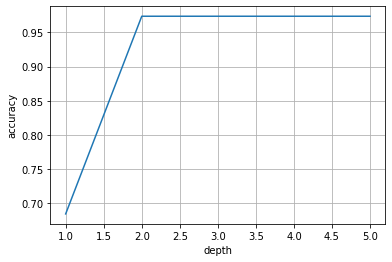

In [ ]:
plt.plot(max_depth_lista,accuracy)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show()

# Dataset del Titanic

## 1. Importar librerías necesarias

In [26]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import statistics as stat

## 2. Importar dataset de Titanic

In [27]:
df_titanic = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Databasets/dataset_titanic.csv")
df_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## 3. Graficando datos

In [28]:
print("\nValores nulos totales: \n", df_titanic.isnull().sum())


Valores nulos totales: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


0    0.616162
1    0.383838
Name: Survived, dtype: float64


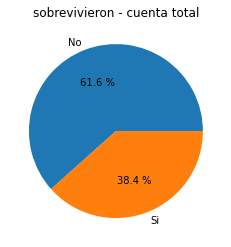

In [29]:
datos=df_titanic.Survived.value_counts(normalize = True)
print(datos)
plt.pie(datos, labels=["No","Si"], autopct="%0.1f %%")
plt.title("sobrevivieron - cuenta total")
plt.show()

female    0.681287
male      0.318713
Name: Sex, dtype: float64


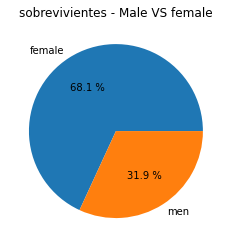

In [30]:
plt.title("sobrevivientes - Male VS female")
datos=df_titanic.Sex[df_titanic.Survived == 1].value_counts(normalize = True)
print(datos)
plt.pie(datos, labels=["female","men"], autopct="%0.1f %%")
plt.show()

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64


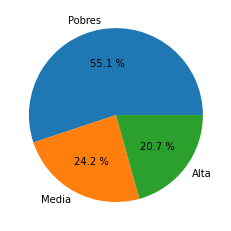

In [31]:
datos = df_titanic.Pclass.value_counts(normalize = True)
print(datos)
plt.pie(datos, labels=["Pobres", "Media", "Alta"], autopct="%0.1f %%")
plt.show()

In [32]:
df_new = df_titanic.dropna()
intervalos = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

edades_primera_clase = np.array(df_new[df_new.Pclass == 1]['Age'])
edades_segunda_clase = np.array(df_new[df_new.Pclass == 2]['Age'])
edades_tercera_clase = np.array(df_new[df_new.Pclass == 3]['Age'])

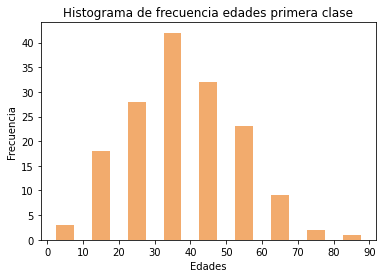

In [33]:
plt.hist(x=edades_primera_clase, bins=intervalos, color='#F2AB6D', rwidth=0.5)
plt.title('Histograma de frecuencia edades primera clase')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)
plt.show()

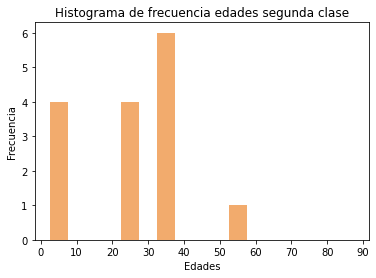

In [34]:
plt.hist(x=edades_segunda_clase, bins=intervalos, color='#F2AB6D', rwidth=0.5)
plt.title('Histograma de frecuencia edades segunda clase')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)
plt.show()

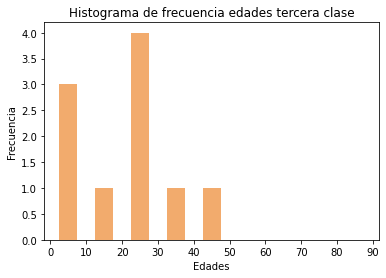

In [35]:
plt.hist(x=edades_tercera_clase, bins=intervalos, color='#F2AB6D', rwidth=0.5)
plt.title('Histograma de frecuencia edades tercera clase')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)
plt.show()

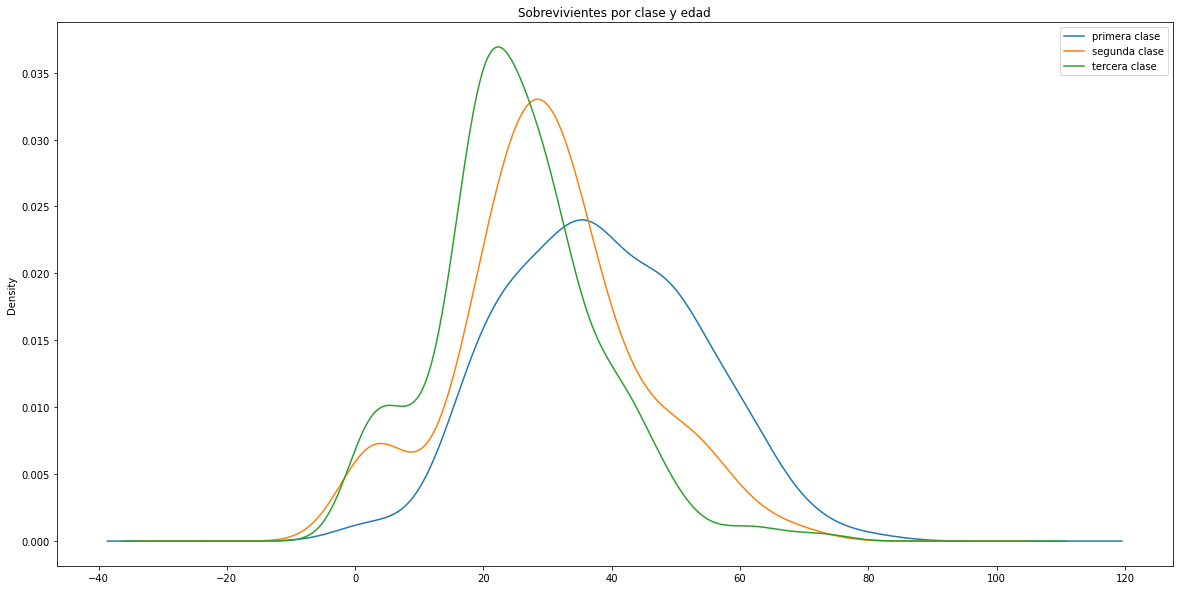

In [36]:
fig = plt.figure(figsize=(20,10))
plt.title("Sobrevivientes por clase y edad")
for t_class in [1,2,3]:
    df_titanic.Age[df_titanic.Pclass == t_class].plot(kind="kde")
    
plt.legend({"primera clase", "segunda clase", "tercera clase"})
plt.show()

## 4. Normalizando datasets

### 4.1 Reemplazar palabras por caracteres numéricos

In [37]:
a = {"male" : "M", "female" : "F"}
df_titanic["Sex"] = df_titanic["Sex"].apply(lambda x:a[x])
df_titanic["Sex"].head()

0    M
1    F
2    F
3    F
4    M
Name: Sex, dtype: object

In [38]:
le = preprocessing.LabelEncoder()
df_titanic['Sex'] = le.fit_transform(df_titanic['Sex'])

### 4.2 Asignando valores a campos nulos

In [ ]:
# Hallando el valor de la media
def get_mean(numpy_array, menor, mayor):
    avg_lts = np.array([numpy_array[i] for i in range(len(numpy_array))
                        if menor < numpy_array[i] < mayor])
    return int(stat.mean(avg_lts))

for i in range(len(df_titanic.isnull()['Age'])):
    if df_titanic.isnull()['Age'][i]:
        if df_titanic.Pclass[i] == 1:
            df_titanic.loc[i, 'Age'] = get_mean(edades_primera_clase, 30, 40)
        elif df_titanic.Pclass[i] == 2:
            df_titanic.loc[i, 'Age'] = get_mean(edades_segunda_clase, 30, 40)
        elif df_titanic.Pclass[i] == 3:
            df_titanic.loc[i, 'Age'] = get_mean(edades_tercera_clase, 20, 30)



### 4.3 Eliminando columnas del DataFrame

In [ ]:
df_titanic.drop(['Cabin','PassengerId','Name','Ticket','Embarked '], axis=1,inplace=True)
df_titanic.dropna(inplace=True)
df_titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
5,0,3,1,26.0,0,0,8.4583
6,0,1,1,54.0,0,0,51.8625
7,0,3,1,2.0,3,1,21.0750
8,1,3,0,27.0,0,2,11.1333
9,1,2,0,14.0,1,0,30.0708


In [ ]:
print("\nValores nulos totales: \n", df_titanic.isnull().sum())


Valores nulos totales: 
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64


## 5. Instanciar el árbol de decisión

In [ ]:
arbol = DecisionTreeClassifier(max_depth=5, random_state=5)

## 6. Separar los datos para el entrenamiento

In [ ]:
x = df_titanic[["Pclass", "Sex", "Age", "SibSp", "Parch"]]
y = df_titanic["Survived"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)
arbol.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')

## 7. Realizar prediciones a partir del modelo

In [ ]:
y_train_predict = arbol.predict(x_train)
y_test_predict = arbol.predict(x_test)

print(f"Accuracy of train: %{str(accuracy_score(y_train_predict, y_train))}")
print(f"Accuary of train %{str(accuracy_score(y_test_predict, y_test))}")
print(f"Accuary global %{str(arbol.score(x_test, y_test))}")

Accuracy of train: %0.826645264847512
Accuary of train %0.8544776119402985
Accuary global %0.8544776119402985


## 8. Graficando el árbol

In [ ]:
class_name_list = list(["dead", "live"])
dot_data = export_graphviz(arbol,feature_names=["Pclass","Sex", "Age", "SibSP", "Parch"], class_names=class_name_list)
graph = graph_from_dot_data(dot_data)
graph.write_png('arbol_titanic.png')

True